In [78]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from matplotlib import pyplot as plt

In [79]:
# This block is where we will import our nba statistics data

# This is the data we'll use to train our model
train_year = 2009
nba_train = pd.read_csv(f'{train_year}.csv', header=0, index_col=0)

# This import is for our data we'll use to test our model
test_year = 2007
nba_test = pd.read_csv(f'{test_year}.csv', header=0, index_col=0)

In [80]:
#These are the features we will be using to try to predict player positions
features = ['Age','G','GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


# This is what we will be trying to predict
label = ['Pos']


# This will be used to convert the string representations of the positions to a number 1-5
pos_dict = {'PG':1,'SG':2,'SF':3,'PF':4,'C':5,'SF-PF':3,'PF-SF':4,'SF-SG':3,'C-PF':5, 'PF-C':4,'PG-SG':1, 'SG-PG':2,'SG-SF':2, 'SG-PF':2}




In [81]:
# This gives us a dataframe filled with only the values we'll use to predict positon.
X_train = nba_train[features]

# This gives us a dataframe filled with only the correct position of each player.
Y_train = nba_train[label].replace(to_replace=pos_dict,value=None,)

# This gives us a dataframe filled with only the values we'll use to predict positon.
X_test = nba_test[features]

# This gives us a dataframe filled with only the correct position of each player.
Y_test = nba_test[label].replace(to_replace=pos_dict,value=None,)

In [82]:
# This is where we create, train, and test our decision tree.
# We'll use the gini method of optimization here.

# Gini is a method of optimizing the tree.
clf = DecisionTreeClassifier(criterion='gini')

# This is where we train the tree using our training data from the last block.
clf = clf.fit(X_train,Y_train)

# This is wehre we feed our newly trained model some test data and see how it does.
y_pred = clf.predict(X_test)

# This will print how well our model did
f'{ round(metrics.accuracy_score(Y_test, y_pred) * 100,2)}% Accuracy'



'50.0% Accuracy'

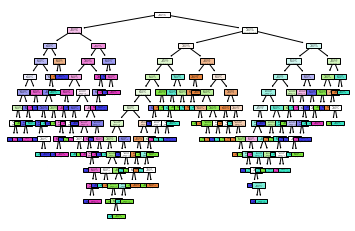

In [83]:
# This will create and save a photo of our gini tree that you can view.

plt.figure()
plot_tree(decision_tree=clf, feature_names=features,
                   label='all',filled=True,)  
plt.savefig('gini_nba_tree.eps',format='eps',bbox_inches = "tight")

In [84]:
# This is where we create, train, and test our decision tree. 
# We'll use the entropy method of optimization here.
# This block accomplishes the same thing as the previous tree, just using Entropy instead of gini.

# Entropy is a method of optimizing the tree.
clf= DecisionTreeClassifier(criterion='entropy')

# This is where we train the tree using our training data from the last block.
clf = clf.fit(X_train,Y_train)

# This is wehre we feed our newly trained model some test data and see how it does.
y_pred = clf.predict(X_test)

# This will print how well our model did
f'{ round(metrics.accuracy_score(Y_test, y_pred) * 100,2)}% Accuracy'



'47.82% Accuracy'

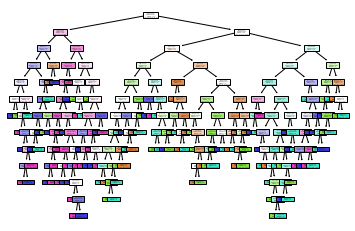

In [85]:
# This will create and save a photo of our entropy tree that you can view.

plt.figure()
plot_tree(decision_tree=clf, feature_names=features,
                   label='all',filled=True,)  
plt.savefig('entropy_nba_tree.eps',format='eps',bbox_inches = "tight")